In [0]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#!pip3 install --upgrade seaborn cufflinks plotly
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Sharing homework on `planets` dataset



`planets` is a new dataset from seaborn that we have never explored. You can find the code to run it in the cell below.

This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
Sat Feb 15 11:18:19 2014

* `method`:              `Discovery Method`
* `number`:              `Number of Planets in System`
* `orbital_period`:      `Orbital Period (val)`
* `mass`:                `Planet M*sin(i) [jup] (val)`
* `distance`:            `Distance (val)`
* `year`:                `Year of Discovery`
---


* Questions
* Hypothesis
* Verify by plotting

In [0]:
planets = sns.load_dataset('planets')

In [0]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


# Example Solution

**Question**: Have the most effective discovery method for shorter distance and for longer distance been different? If they were different, which method was the most effective for discovering the nearer planets and which for the farther away ones?

**Hypothesis**: Depending on the methods the distribution of distance will be different. Radial Velocity will be most effective for the shorter ones and microlensing for the farther away ones.

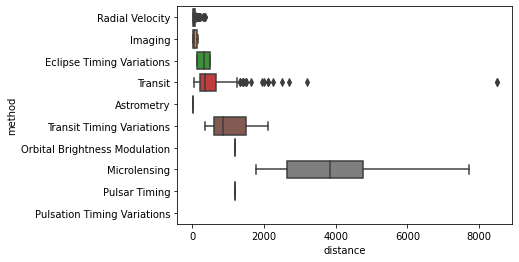

In [6]:
sns.boxplot(x='distance', y='method', data=planets)

It seems to be right that the most effective method for the discovery of planets are different depending on distance. Also Microlensing seems to be most effective for the farther distance. But it is hard to compare radial velocity and imaging for the shorter distance. 

**Subsequent Question**: How do we compare their distribution? Is it possible that one of them has more accumulated numbers only because this methods is developed earlier?

**Hypothesis**: Their distribution will be similar in a closer look. The Radial Velocity method has been historically the most efficient method to find planets nearby but the Imaging method is more effective now.

In [8]:
short = planets[planets['method'].isin(['Radial Velocity', 'Imaging'])]

ERROR! Session/line number was not unique in database. History logging moved to new session 59


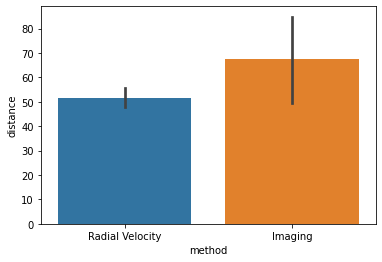

In [9]:
sns.barplot(x='method', y='distance', data=short)

In [0]:
radial_velocity = planets[planets['method']=='Radial Velocity']
imaging = planets[planets['method']=='Imaging']

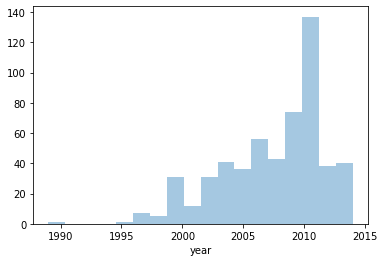

In [12]:
sns.distplot(radial_velocity['year'], kde=False)

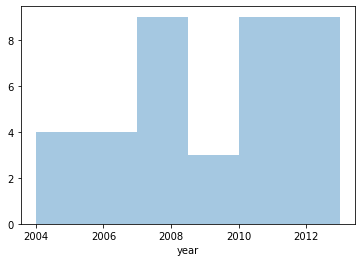

In [13]:
sns.distplot(imaging['year'], kde=False)

**conclusion**
- Depending on the distance the most effective method to find the planets vary. Most of far away planets were found by microlensing and most of nearby planets were found by radial velocity. Although the imaging method was started to be used more recently, the radial velocity method has been far more efficient. 

# Group Discussion

- share your homework results with others in the groups
- The above conclusion is intensionally **wrong**. What is still missing? What would you still visualize and validate more?

# Checklist

**Question! Question! Question!**
- Can I answer my question using my dataset? What is missing? Can I extract a new feature to answer my question? How can I even collect more data to answer my question?
- Is my conclusion right? What is still not validated or should be checked? Can I dig deeper? Do I have enough domain knowledge to ask and answer a right question?

# Change over Time: `lineplot` in `seaborn`

In [0]:
solar = pd.read_csv('https://raw.githubusercontent.com/hahey/playground/master/talk_plotting_EDA_at_redischool/dataset/installed-solar-PV-capacity.csv')

In [0]:
solar.head()

,Entity,Code,Year,Solar Capacity (gigawatts)
0,Algeria,DZA,1996,0.0
1,Algeria,DZA,1997,0.0
2,Algeria,DZA,1998,0.0
3,Algeria,DZA,1999,0.0
4,Algeria,DZA,2000,0.0


In [0]:
entities = solar['Entity'].unique()
entities

array(['Algeria', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'China', 'Czech Republic', 'Denmark', 'Egypt',
       'Europe (other)', 'Finland', 'France', 'Germany', 'Greece',
       'Honduras', 'Hungary', 'India', 'Israel', 'Italy', 'Japan',
       'Jordan', 'Malaysia', 'Mexico', 'Netherlands', 'Norway',
       'Other Africa', 'Other Asia & Pacific', 'Other CIS',
       'Other Middle East', 'Other S. & Cent. America', 'Pakistan',
       'Philippines', 'Portugal', 'Romania', 'Russia', 'Slovakia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan', 'Thailand', 'Total Africa', 'Total Asia Pacific',
       'Total CIS', 'Total Europe', 'Total Middle East',
       'Total North America', 'Total S. & Cent. America', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'World'], dtype=object)

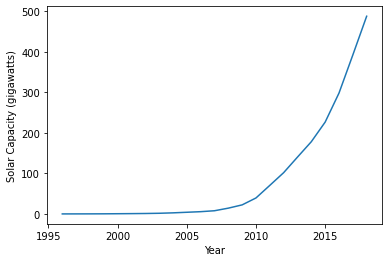

In [0]:
solar_world = solar[solar['Entity']=='World']
sns.lineplot(x='Year', y='Solar Capacity (gigawatts)', data=solar_world)

In [0]:
continents = [e for e in entities if e.startswith('Total')]
continents

['Total Africa',
 'Total Asia Pacific',
 'Total CIS',
 'Total Europe',
 'Total Middle East',
 'Total North America',
 'Total S. & Cent. America']

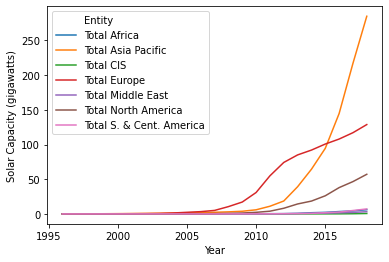

In [0]:
solar_continent = solar[solar['Entity'].isin(continents)]
sns.lineplot(x='Year', y='Solar Capacity (gigawatts)', hue='Entity', data=solar_continent)

# Lineplot revisited : `plot` in `mathplotlib.pyplot` 

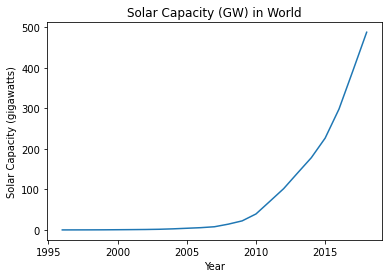

In [0]:
plt.xlabel('Year')
plt.ylabel('Solar Capacity (gigawatts)')
plt.title('Solar Capacity (GW) in World')
plt.plot('Year', 'Solar Capacity (gigawatts)', data=solar_world)
plt.show()

# Exercise

- Plot the change of Solar Capacity over years for your three favorite countries

# Part as a whole: `pie` at `mathplotlib.pyplot` 

In [0]:
renewable_mix = pd.read_csv('https://raw.githubusercontent.com/hahey/playground/master/talk_plotting_EDA_at_redischool/dataset/modern-renewable-energy-consumption.csv')
renewable_mix.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 64


,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
0,Africa,NaN,1965,14.278806,0.0,0.0,0.0
1,Africa,NaN,1966,15.649049,0.0,0.0,0.0
2,Africa,NaN,1967,16.158333,0.0,0.0,0.0
3,Africa,NaN,1968,18.622983,0.0,0.0,0.0
4,Africa,NaN,1969,21.582897,0.0,0.0,0.0


In [0]:
world_2018 = renewable_mix[(renewable_mix['Entity']=='World') & (renewable_mix['Year']==2018)]
world_2018

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
5090,World,OWID_WRL,2018,4193.104151,584.630918,1269.953375,625.805362


In [0]:
energy = [c for c in renewable_mix.columns if c.endswith('(terawatt-hours)')]
print(energy)
world_2018[energy]

['Hydropower (terawatt-hours)', 'Solar (terawatt-hours)', 'Wind (terawatt-hours)', 'Other renewables (terawatt-hours)']


,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
5090,4193.104151,584.630918,1269.953375,625.805362


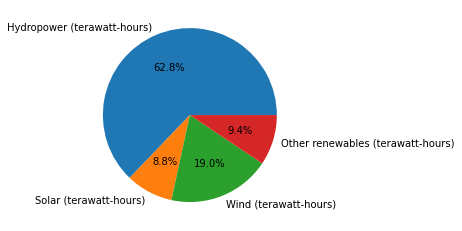

In [0]:
plt.pie(world_2018[energy], labels=energy, autopct='%1.1f%%')
plt.show()

# Part as a whole: `bar` from `mathplotlib.pyplot`

In [0]:
world_mix = renewable_mix[renewable_mix['Entity']=='World']
world_last7years = world_mix[world_mix['Year'].isin(range(2012, 2019))][['Year'] + energy]
world_last7years

,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
5084,2012,3666.772983,100.764432,523.809398,430.849657
5085,2013,3793.229045,139.058571,645.302185,464.060209
5086,2014,3883.143443,197.910508,712.031697,502.158919
5087,2015,3884.417357,260.739219,831.384507,536.466244
5088,2016,4017.743773,328.378114,956.873542,556.623356
5089,2017,4065.443127,453.517657,1127.989587,584.975827
5090,2018,4193.104151,584.630918,1269.953375,625.805362


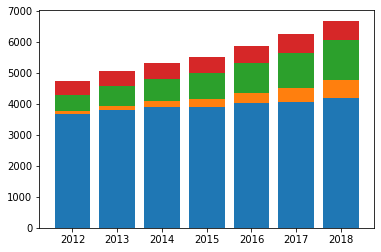

In [0]:
index = np.arange(0.5, len(world_last7years['Year']))
y_offset = np.zeros(len(world_last7years['Year']))
for e in energy:
    plt.bar(index, world_last7years[e], bottom=y_offset, tick_label=world_last7years['Year'])
    y_offset = y_offset + world_last7years[e]
plt.legend(energy)

# Exercise 

 - discuss the difference between `seaborn` and `mathplotlib.pyplot`
 - understand and play around the code

# Homework

 - reproduce it by picking one country

# Multivariate Analysis: `pairplot` in `seaborn`

In [0]:
some_continent_mix = renewable_mix[renewable_mix['Entity'].isin(['Asia Pacific', 'Europe'])]

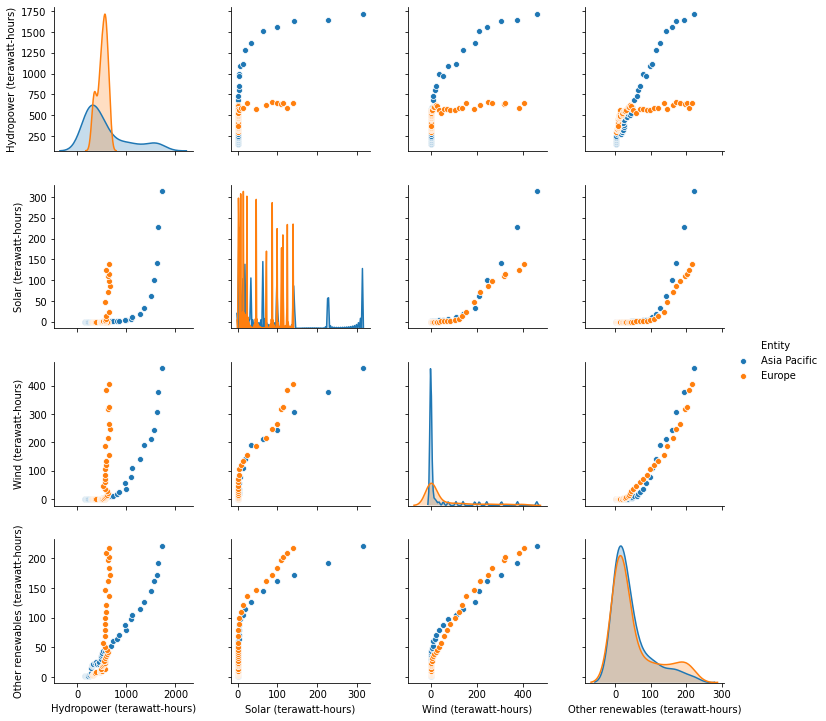

In [0]:
sns.pairplot(some_continent_mix[energy + ['Entity']], hue='Entity')

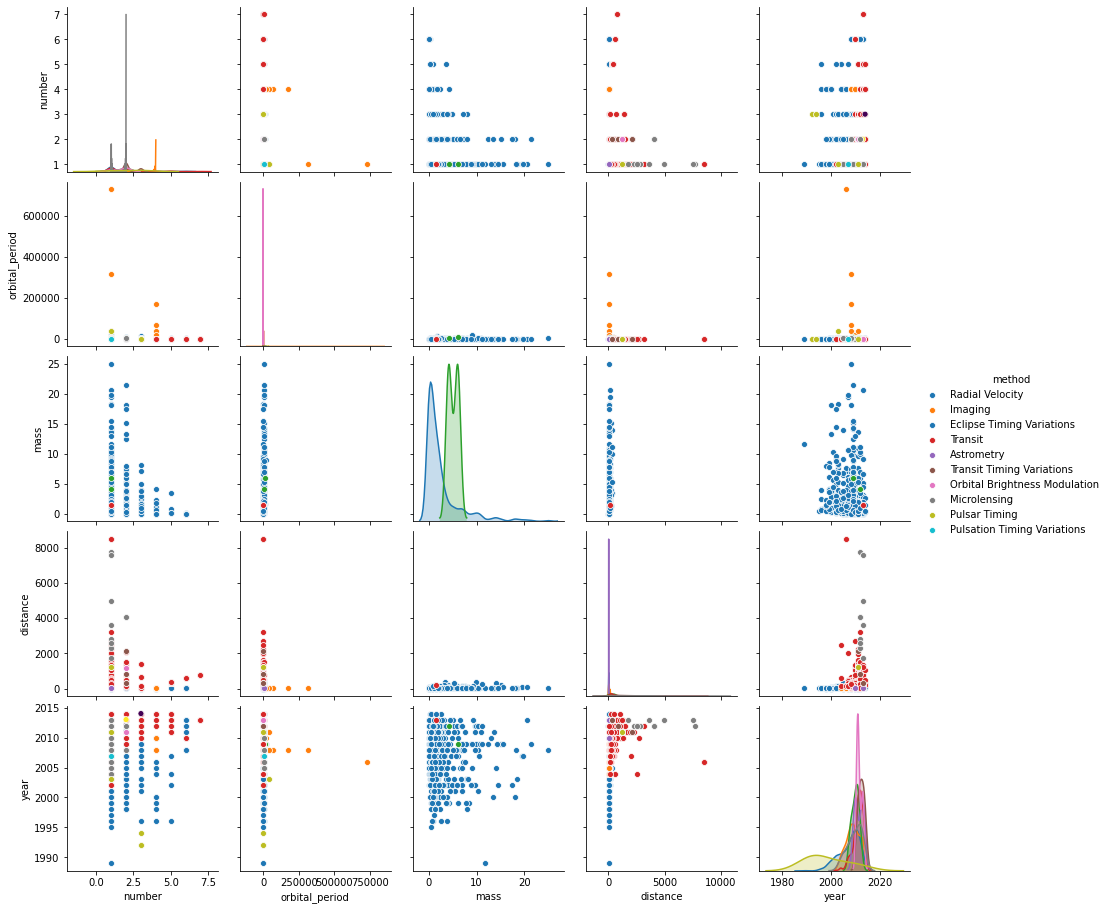

In [5]:
sns.pairplot(planets, hue='method')

# Homework: reverse exploration

##### Step 1
 - pick one of the following datasets: `tips`, `planets`, `solar capacity`, and `renewable mix`

##### Step 2
 - pick one of the `seaborn` API that we have not explored so far: e.g.) `boxenplot`, `swarmplot`, `violinplot` and so on.

##### Step 3
 - formulate your question and hypothesis that you can validate on the chosen dataset using the chosen API

##### Step 4
 - extract or compute the proper features from the chosen dataset to validate or reject your hypothesis

##### Step 5
 - read carefully the usage and the syntax of API in the `seaborn` tutorial and API instructions

##### Step 6
 - visualize and play around more to validate or reject your hypothesis

##### Step 7
 - share your finding with the classmates in the next class

**Please go through the following checklist if you are done**

# Checklist

- Do you feel now more comfortable with formulating the question and the hypothesis?
- Do you feel now more comfortable with extracting the relevant information and adding new features to `pandas DataFrame`?
- Are you more confident that you can learn the syntax of a new plotting function by your own?